<img src=attachment:e835475e-b36f-44cf-8f1f-15204b79016a.png width=1000>
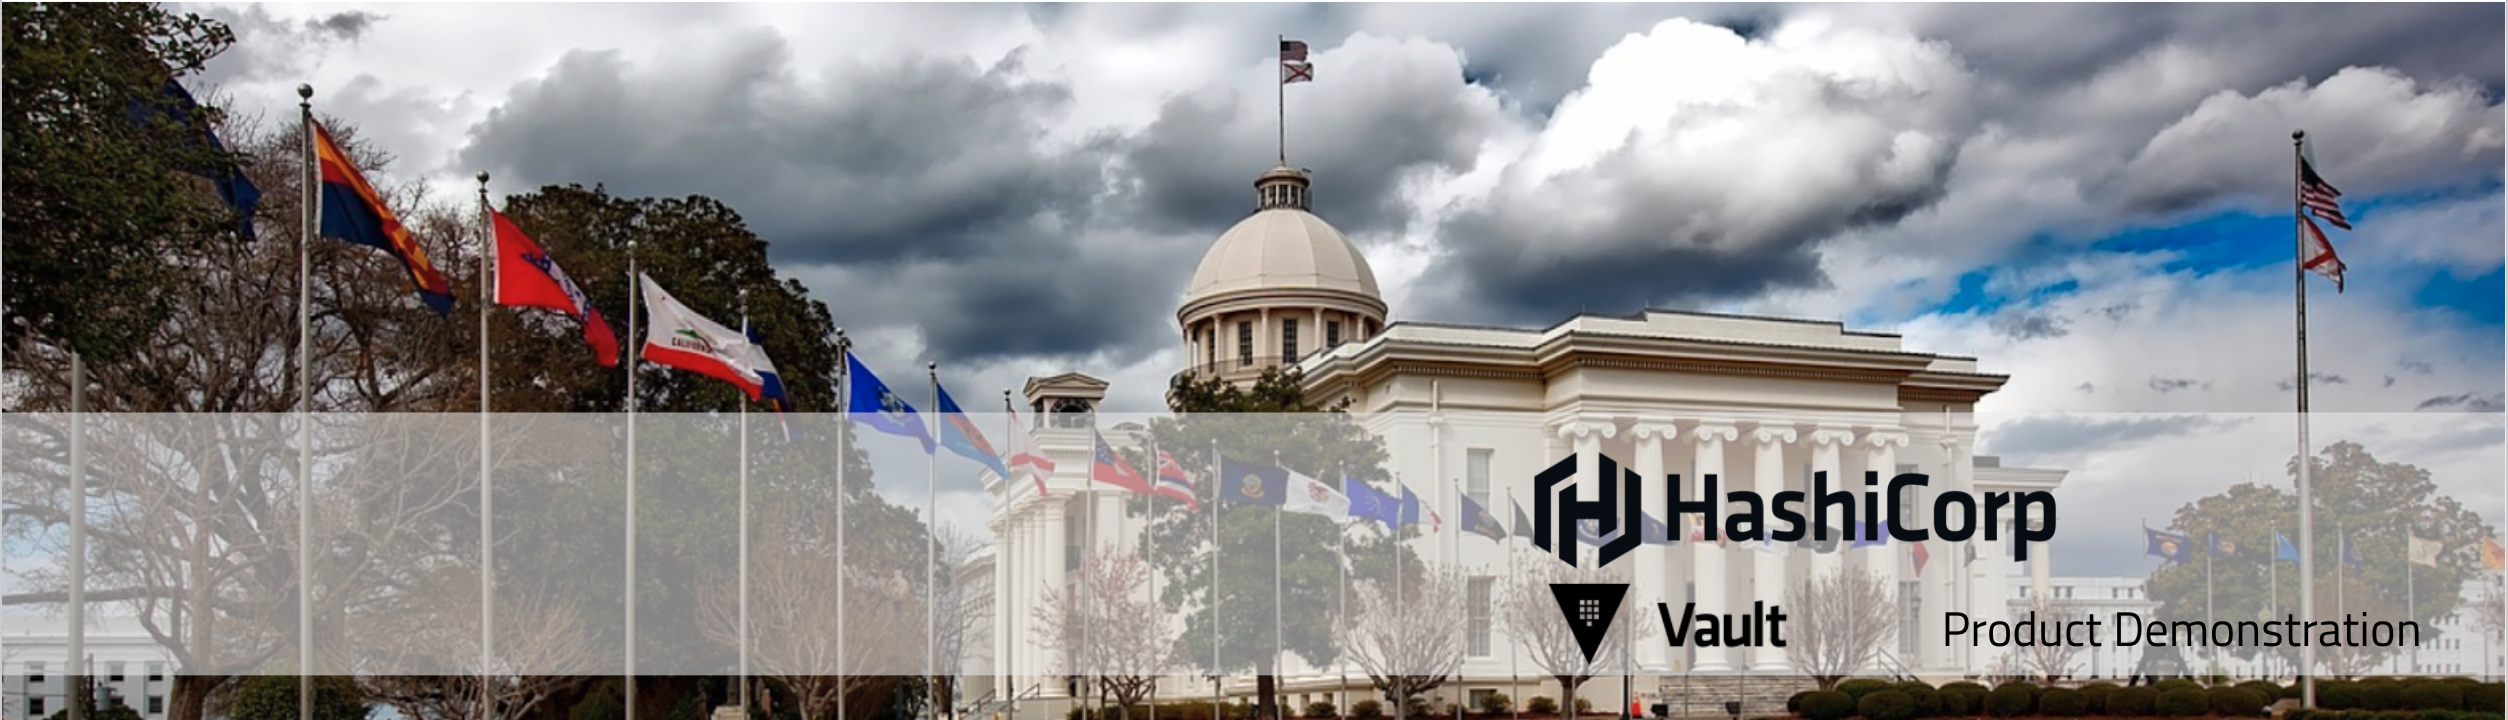

# Username/Password auth with policies

## Business Value of Capability
 * Support for a standard expected capability
 * Takes the guesswork out of creating pwds
 * provides an API for pulling and using them

### Prerequisites
* Running Vault Enterprise instance (even in dev mode)

<img src=attachment:image.png width=1000>
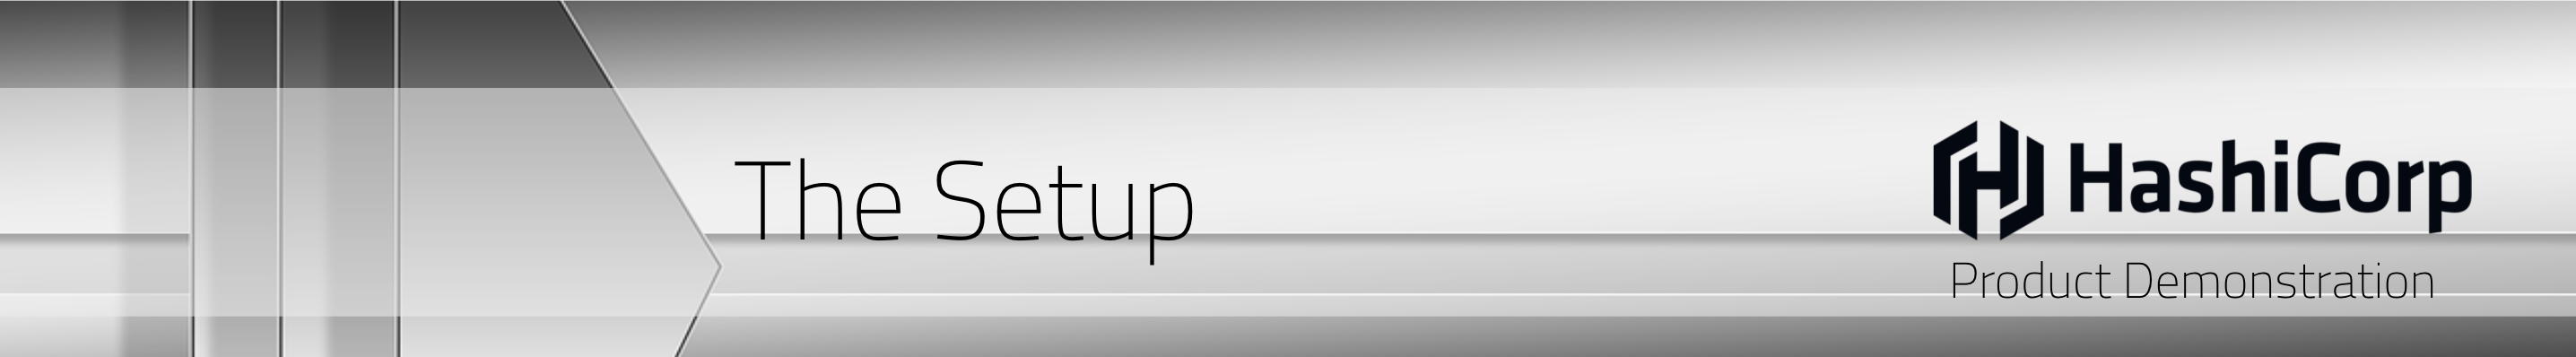

In [ ]:
export VAULT_ADDR=http://127.0.0.1:8200
export VAULT_TOKEN=root
export VAULT_SKIP_VERIFY=true

In [ ]:
vault login root

In [ ]:
vault status

In [ ]:
vault -version

<img src=attachment:image.png width=1000>
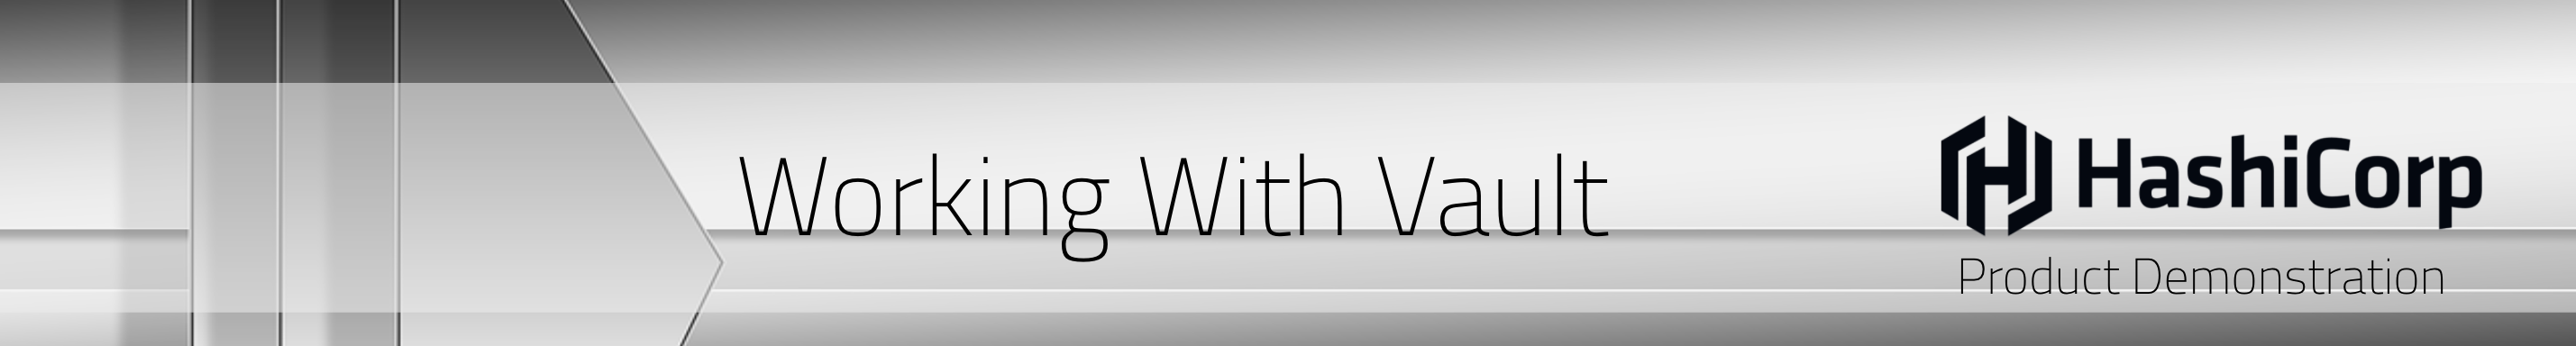

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Create a policy in vault to control different paths</span>

In [ ]:
## Create a new policy to govern this use case
## CREATE SOME ACL Policies 
echo '
path "sys/mounts" {
  capabilities = ["list","read"]
}
path "secret/*" {
  capabilities = ["create"]
}
path "secret/foo" {
  capabilities = ["read"]
}
path "auth/userpass/users" {
  capabilities = ["read"]
}

# Dev servers have version 2 of KV mounted by default, so will need these
# paths:
path "supersecret/*" {
  capabilities = ["list","create","read"]
}
path "supersecret/data/*" {
  capabilities = ["list","create","read"]
}
path "supersecret/data/admin" {
  capabilities = ["list"]
} ' | vault policy write user -

In [ ]:
# Disable generic backends
vault secrets disable supersecret

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Turn on Username / Password Engine </span>

In [ ]:
# Enable an Auth method: username / password
vault auth enable userpass

In [ ]:
# List auth methods
vault auth list

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Create 2 New users: admin and demo</span>

In [ ]:
# Create 2 users - demo and admin (idempotent)
# link the demo user  to the user policy 
# link the admin user to the admin policy
vault write auth/userpass/users/demo password=test policies=user
vault write auth/userpass/users/admin password=admin policies=admin-policy

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Example of bad login</span>

In [ ]:
# Auth using userpass on CLI or in UI
## this should fail
vault login -method=userpass username=jn password=joker

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Who are the users</span>

In [ ]:
# Who are our users ? no wonder it failed. 
vault list auth/userpass/users

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Log in as demo</span>

In [ ]:
# To Login with token - we saw this
vault login -method=userpass username=demo password=test

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Generate Tokens at will tied to policy</span>

In [ ]:
# To Create Token

vault token create -display-name=jamo -policy=user -ttl=1h

In [ ]:
vault token lookup s.KRP9HgylA2BSlXHQ5phGz061

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Revoke a token</span>

In [ ]:
# To REVOKE TOKEN
vault token revoke KRP9HgylA2BSlXHQ5phGz061

---
### <span style="background-color: #001f3f; color: #80bfff; padding: 15px; border-radius: 2px">Delete Auth Method Data</span>

In [ ]:
# delete the admin
vault delete auth/userpass/users/admin

<img src=attachment:image.png width=1000>

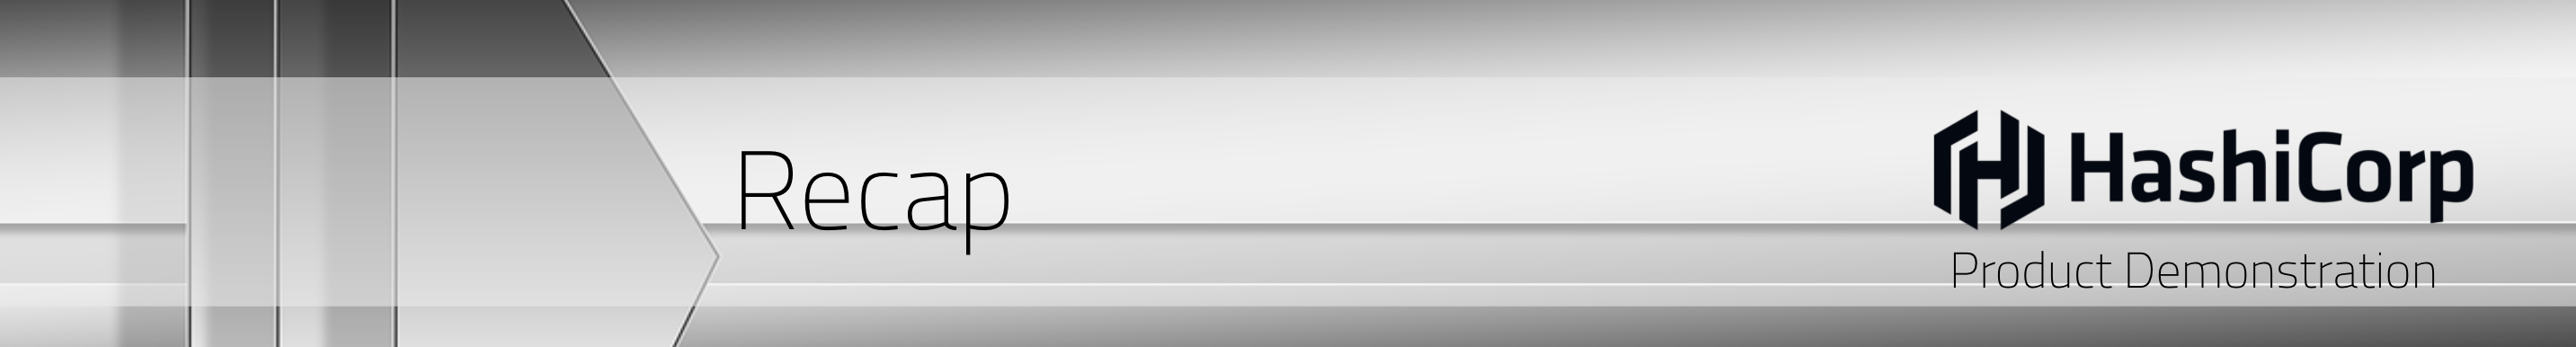

* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Create users tied to policies</span>
* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Issue timed tokens</span>
* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Login IN/OUT as users</span>
* ## <span style="color: #001f3f; padding: 15px; border-radius: 2px">Use UI if preferred</span>